<a href="https://colab.research.google.com/github/marcosilvaa/dados_estudos/blob/main/Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

`Scikit-Learn` é uma biblioteca de machine learning para Python.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" width=250px ></center>

Pensada para se unir aos diversos pacotes científicos que orbitam as bibliotecas como `Numpy` e `Scipy`, o Scikit-Learn tem a proposta de ser uma ferramenta que combina eficiência e estabilidade enquanto totalmente acessível àqueles que não são os verdadeiros experts em machine learning.

De acordo com a sua [documentação oficial](https://scikit-learn.org/stable/getting_started.html), o `Scikit-learn` é uma biblioteca *open source* que suporta tanto o aprendizado supervisionado quanto o não supervisionado, assim como disponibiliza diversas ferramentas para *model fitting*, pré-processamento de dados, seleção de modelos e avaliação, entre outras várias utilidades. 

Para aprofundar no conhecimento da arquitetura da biblioteca, o paper [API design for machine learning software: experiences from the scikit-learn project](https://arxiv.org/abs/1309.0238) é uma ótima referência a qual detalha o funcionamento da biblioteca.



## Representação dos Dados no `Scikit-Learn`

A equipe de desenvolvimento da biblioteca optou por escolher a representação de dados que mais se pareça com a representação matricial. Na prática, os *datasets* são codificados de duas maneiras possíveis:

1. Arrays multidimensionais do `Numpy`, para dados densos; 
2. Matrizes esparças do `Scipy`, para dados esparços;

De acordo com o paper referenciado anteriormente, foi decidio utilizar esta maneira de representação mesmo com outras mais sofisticadas, pois assim permite que se possa contar com toda a eficiência das operações vetorizadas do `Numpy` e `Scipy` e ainda contar com a ligibilidade do código.


In [70]:
# importando conjunto de dados
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/heart-disease-uci.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Cada linha presente nos tras informações de um único registro, assim como cada coluna representa uma *feature* (um atributo ou variável).

Para este *dataframe* em questão, para podermos criar um modelo de regressão, seria necessário dividí-lo em uma matriz `X` contendo as variáveis independentes (*Features*) e um vetor alvo `y` contendo as variáveis dependentes (variáveis alvo).

In [71]:
X = df.drop('num', axis=1)
y = df.num

print("df.shape:\t{}".format(df.shape))
print("X.shape:\t{}".format(X.shape))
print("y.shape:\t{}".format(y.shape))

df.shape:	(303, 14)
X.shape:	(303, 13)
y.shape:	(303,)


## Interfaces do *Scikit-Learn*

O design da biblioteca é organizado em volta de [três APIs fundamentais](https://towardsdatascience.com/scikit-learn-design-principles-d1371958059b), pilares básicos do `Scikit-learn`: ***Estimator, Predictor*** e ***Transformer***, e é uma prova do poder que dos *design patterns*.

As interfaces complementam umas as outras, ao inves de se limitarem ou se excluirem.

### Estimator API 

Fazem do coração do *Scikit-Learn*. Através desta interface que você vai instanciar os objetos e rodar o método `fit` para treinar o modelo.

Todo o algoritmo de machine learning da biblioteca é implementado pela API Estimator.

[Como resumiu bem o autor Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), autor do livro *Python Data Science Handbook*, os passos mais comuns para usar essa API são:

1. Escolher a classe do modelo, por meio da importação da *estimator class* apropriada dentro do `Scikit-Learn`.

2. Escolher os hiperparâmetros do modelo, instanciando essa classe com os valores desejados.

3. Separar os dados entre matriz de entre matriz de *feature* e vetor alvo. 

4. Fit do modelo, rodando o método `fit()` na instância do modelo. 

5. Aplicar o modelo aos dados novos, que pode ser: 
    * Para aprendizado supervisionado, comumente é utilizado o método `predict()`
    * Para aprendizado não supervisionado, comumente transformamos ou inferimos as propriedades dos dados usando `transform()` ou `predict()`.










In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000, penalty='l2')
model.fit(X, y)

LogisticRegression(max_iter=100000)

###  Predictor API 

O *Predictor Interface* adiciona uma camada de previsão, onde recebe um array *X_test* e produz uma previsão para *X_test*.

Para o aprendizado supervisionado, ele retorna um *label* com a classe prevista ou o valor calculado pelo modelo de machine learning.

Alguns modelos também trazem o método `predict_proba`, para informar qual a probabilidade daquele input ser mesmo da classe prevista. 

De acordo com o paper citado anteriomente, essa interface traz ainda uma função score, para mensurar a performance do modelo.

In [73]:
import numpy as np

X_test = np.array([36, 1.0, 2.0, 146.9, 210.6, 1.0, 2.0, 183.8, 0.0, 2.1, 2.1, 0.0, 5.0]).reshape(1, -1)
model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

### Transformer API 

Como a maior parte dos dados demanda um devido tratamento ou ser filtrado, a *transformer interface* define o método `transform()`, que recebe um *input `X`* e devolve um *output transformado `X`* 

*Feature Extraction*, reduz a dimensionalidade, padronização, normalização, entre outros, são todos fornecidos por essa API. Veja o exemplo abaixo:

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_test)
X_scaler = scaler.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [75]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [76]:
X_scaler

array([[27. ,  0. , -1. , ...,  0.9,  0. ,  1. ],
       [31. ,  0. ,  2. , ..., -0.1,  3. , -2. ],
       [31. ,  0. ,  2. , ..., -0.1,  2. ,  2. ],
       ...,
       [21. ,  0. ,  2. , ..., -0.1,  1. ,  2. ],
       [21. , -1. ,  0. , ..., -0.1,  1. , -2. ],
       [ 2. ,  0. ,  1. , ..., -1.1,  0. , -2. ]])

## Dados de Treino e Teste

A parte vital para qualquer projeto de *Data Science* é fazer o split dos dados da forma e momento certo.

<center><img src="https://www.machinecurve.com/wp-content/uploads/2020/11/feed-3.jpg" width=400px ></center>

Isso acontece para que não haja vazamento de dados, que pode causar *overfitting*, que significa de maneira simples, que o modelo decorou as respostas ao invés de resolver o problema.

<center><img src="https://miro.medium.com/max/1396/1*lARssDbZVTvk4S-Dk1g-eA.png" width=400px ></center>

*Overfitting* é um grande problema em qualquer tipo de trabalho com *Machine Learning*, como podemos ver na imagem. Um bom modelo não precisa ser perfeito, com uma acurácia de 100%, na verdade uma acurácia de 100% é um forte indicativo de que o modelo sofre com *Overfitting*, sendo motivo de preocupação e não celebração. 

Bons modelos são generalistas o suficiente para entender as nuances do problema, e se adaptarem a novos dados de forma efetiva, é o que buscamos. 

Mas de que forma alcançar? 

É claro que precisamos nos atentar a diversos detalhes e passos no processo de Machine Learning, mas, por enquanto vamos nos ater ao *split* (divisão do conjunto de dados).

## Separando o Dataset

Ao recebermos um conjunto de dados completo, o primeiro passo é separá-lo, como demonstra a primeira figura. Então, dividiremos o conjunto inteiro entre `Treino` e `Teste`, para então dividirmos o `Treino` em `Treino` e `Validação`.


<center><img src="https://miro.medium.com/max/1400/1*RJS8yV5mBDqrRu7THooH-w.png" width=400px ></center>

### Treino

  - O conjunto de treino será o maior, e será usado para a análise de dados, para criação do pipeline de processamento desses dados, e também para criar nossa *baseline*, que usaremos para selecionar o modelo a ser otimizado.

### Validação 

  - Esse predaço do conjunto de treino, será mais ou menos do mesmo t amanho do conjunto de testes, e será usado como um conjunto de teste. Isso significa que o modelo criado não pode ter visto esses dados na análise, assim como os de teste. Por isso esses conjuntos são comumente chamados de `holdout sets`, pois vamos 'segurá-los' até o momento certo de usá-los. 

### Teste

  - Esse conjunto é utilizado apenas no final, com seu modelo pronto, e otimizado, para testar o resultado do modelo pronto com dados novos, da mesma forma que ele receberá esses dados no mundo real. Aqui é onde saberemos a verdadeira performance do modelo, e avaliaremos a mesma baseado nas métricas de interesse para o problema.






In [77]:
# importando dataset
df_housing = pd.read_csv("http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=0")

# ver as primeiras entradas
print(df_housing.shape)
df_housing.head()

(1460, 35)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


Após carregar o conjunto de dados, separe uma fração para ser seu conjunto de teste. É comum ver a proporção 70/15/15 para os conjuntos mas não há uma regra.

Com a chegada do *Big Data*, não é um absurdo encontrarmos proporções de 95/2.5/2.5, dado o grande volume de dados e a importância de se ter um grande conjunto de treino.

Neste exemplo vamos utilizar 15% do dataset como conjunto de teste.

In [79]:
# criando um conjunto de teste
test = df_housing.sample(frac=0.15, random_state=0)

# verificando o conjunto
print(test.shape)
test.head()

(219, 35)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
529,530,20,32668,6,3,1957,1975,1219,0,816,...,0,0,200,0,0,0,0,3,2007,200624
491,492,50,9490,6,7,1941,1950,403,165,238,...,0,0,32,0,0,0,0,8,2006,133000
459,460,50,7015,5,4,1950,1950,185,0,524,...,0,0,248,0,0,0,0,7,2009,110000
279,280,60,10005,7,5,1977,1977,392,0,768,...,288,117,0,0,0,0,0,3,2008,192000
655,656,160,1680,6,5,1971,1971,0,0,525,...,0,0,0,0,0,0,0,3,2010,88000


Uma vez que selecionamos nosso conjunto de teste, precisamos retirar as entradas selecionadas do dataset original, para evitar duplicidade de entradas e vazamento de dados.

In [80]:
# drop das linhas de teste
df_housing = df_housing.drop(test.index)

In [81]:
# verificando o shape do df_housing
df_housing.shape

(1241, 35)

In [83]:
# resetando o index dos conjuntos
df_housing.reset_index()
test.reset_index()

,index,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,529,530,20,32668,6,3,1957,1975,1219,0,...,0,0,200,0,0,0,0,3,2007,200624
1,491,492,50,9490,6,7,1941,1950,403,165,...,0,0,32,0,0,0,0,8,2006,133000
2,459,460,50,7015,5,4,1950,1950,185,0,...,0,0,248,0,0,0,0,7,2009,110000
3,279,280,60,10005,7,5,1977,1977,392,0,...,288,117,0,0,0,0,0,3,2008,192000
4,655,656,160,1680,6,5,1971,1971,0,0,...,0,0,0,0,0,0,0,3,2010,88000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,53,54,20,50271,9,5,1981,1987,1810,0,...,857,72,0,0,0,0,0,11,2006,385000
215,666,667,60,18450,6,5,1965,1979,187,723,...,0,265,0,0,0,0,0,8,2007,129000
216,632,633,20,11900,7,5,1977,1977,822,0,...,192,0,0,0,0,0,0,4,2009,82500
217,322,323,60,10380,7,5,1986,1987,28,1474,...,201,96,0,0,0,0,0,8,2007,301000


Com o conjunto de testes reservado, podemos fazer o split no conjunto de treino para o conjunto de validação com o Scikit-Learn.

In [84]:
# importando pacotes
from sklearn.model_selection import train_test_split

In [86]:
# drop Target
X = df_housing.drop("SalePrice", axis=1)
y = df_housing["SalePrice"]

In [87]:
# fazendo o split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df_housing.shape)

(1054, 34)
(187, 34)
(1054,)
(187,)
(1241, 35)


## Como avaliar um modelo de *Machine Learning*

Após construir um modelo de Machine Learning, várias horas fazendo uma análise exploratória e limpando os dados, treinou em cima do seu conjunto de dados e obteve coeficientes ideais. Qual o próximo passo? 

Medir os resultados e monitorar os indicadores é uma tarefa crucial em qualquer atividade, ainda mais em modelos de Inteligência Artificial. 

Se você não conhece a performance do seu algoritmo, pode comprometer o faturamento de uma empresa e até mesmo a sua imagem.

Existem inúmeras metodologias, métricas e pesquisas sobre esta etapa de avaliação. A fronteira da ciência de dados avança cada vez mais, aquilo que era conhecido como o ápice, possívelmente não será mais dentro de um mês.

À seguir as métricas mais conhecidas pela comunidade.


### Avaliando Modelos de Regressão 

Modelos de regressão buscam prever um valor numérico contínuo. Por exemplo, qual o faturamento esperado para o próximo mês, ou, qual o preço de venda para um imóvel. 

Quando utilizamos o dataset de teste, fazemos a prvisão  $\hat{y}_i$ para a $i\text{-ésima}$ linha, uma vez que também temos o valor real $y_i$, podemos calcular esse erro de diferentes formas.

<center><img width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/regressao_loss.png"></center>

Na imagem acima, considere que a reta representa seu modelo de regressão, ou seja, a própria previsão. Cada seta(vetor) representa a diferença entre o valor real e a previsão. Sendo assim, cada seta representa o quanto seu modelo errou naquela previsão específica. Ao medir as distâncias entre os pontos e a reta, você vai ter o seu erro, ou ***loss***.

No exemplo acima, é nítido que o modelo plotado à esquerda tem um erro maior do que o da direita, mostrando que o modelo à direita é melhor.

Existem diversas métricas que podem ser utilizadas para conferir o desempenho de um modelo. 

Vamos conferir os principais:


#### -- *Mean Absolut Error* - MAE 

De todos os meios, este é o mais simples. Calcula-se a média da magnitude do erro para todos os pontos onde realizamos previsões, sem considerar a direção. 

$$MAE = \frac{1}{m}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

É a mais intuitiva de todas as métricas, pois olhamos a diferença absoluta entre a previsão e o real.

O problema desta métrica é que todos os erros individuais são tratados da mesma maneira, o que pode ser um problema na hora de lidar com os *outliers* 

#### -- *Mean Squared Error* - MSE

O MSE calcula a média dos erros elevados à segunda potência.

$$MSE = \frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2$$

A vantagem aqui é que os erros mais grotescos serão mais penalizados, o que implica que diferenças menores terão menos impacto ao serem avaliadas. 

Pode haver uma dificuldade na sua interpretação, uma vez que a unidade de medida será alterada.

#### -- *Root Mean Squared Root* - RMSE

Calcular a raiz quadrada da média dos quadrados dos erros, faz com que a RMSE penalize ainda mais os erros maiores, sendo mais sensível aos *outliers*

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2}$$

Note que as diferenças são elevadas ao quadrado antes que a média seja calculada. 

Essa métrica é útil em situações onde desejamos que grandes erros sejam evitados ao máximo.

#### -- *R-Squared* - $R^2$

Apesar de R-Squared não se tratar de *erros* propriamente, é comum utilizá-lo para verificar a acurácia do modelo de regressão. 

$$R^2 = 1 - \frac{\sum_{j=1}^{m}(y_i - \hat{y}_i)^2}{\sum_{j=1}^{m}(y_i - \bar{y}_i)^2}$$

Você pode entender essa métrica como sendo "Quão bom o modelo está em relação aos valores reais", e faz isso calculando as variâncias em relação à media e à reta.


### Avaliando Modelos de Classificação

Seja trabalhando com classificação binária ou com diversas classes, as métricas relacionadas a modelos de classificação não podem ser os mesmos que usamos para modelos de regressão. 

#### -- Acurácia

Definitivamente, é a métrica mais intuitiva e fácil de se entender. A acurácia nos mostra diretamente a porcentagem de acertos do nosso modelo.

$$ 
\text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}} 
$$

Apesar de ser direta e intuitiva, a acurácia não é uma boa métrica quando você lida por exemplo, com dados desbalanceados.

Em um *dataset* de fraudes bancárias, o número de eventos classificados como fraude pode ser inferior a 1%. Ou seja, a acurácia do modelo será superior para os casos de não fraude e nao retratará bem a natureza do nosso problema. 

No exemplo de fraude bancária, o banco irá preferir uma acurácia global, e ter um número maior de alarmes falsos.

Confira este exempl do curso *Machine Learning Crash Course* do Google. Pode-se observar que olhar simplesmente para a acurácia pode levar a conclusões erradas. Abaixo, estamos olhando os resultados de um modelo para detecção de tumores malignos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/acuracia.png"></center>

Uma acurácia de 91% pode levar a uma interpretação equivocada, pois o modelo conseguiu detectar corretamente apenas 1 dos 9 tumores malignos. Para situações assim, onde os dados encontram-se desbalanceados, o ideal é separar os erros em diferentes tipos, e não apenas usar uma métrica global de acurácia.

**Tipos de Erros** 

* **Verdadeiro Positivo (*true positive* - TP):**
Por exemplo, quando o paciente tem um tumor maligno e o modelo classifica como tendo tumor maligno.

* **Falso Positivo (*False positive* - FP):**
Por exemplo, quando o paciente não tem tumor maligno e o modelo classifica como tendo tumor maligno.

* **Falso Negativo (*True Negative* - TN):** 
Por exemplo, quando o paciente tem tumor maligno e o modelo classifica como não tendo tumor maligno.

* **Verdadeiro Negativo (*false negative - FN*):**
Por exemplo, quando o paciente não tem tumor maligno e o modelo classifica como não tendo tumor maligno.

Com estes conceitos básicos, vamos conferir outras métricas à seguir:

#### -- Precision

A precisão diz respeito à quantidade (proporcional) de identificações positivas feita corretamente, e é obtida pela equação

$$
\frac{TP}{TP+FP}
$$

Ela responde **"Qual a proporção de identificações positivas que estava correta?"** Esse valor será máximo(1.0) quando não produzir falsos negativos.

No exemplo do tumor maligno, a precisão seria de 50%, o que significa que quando o modelo prevê um tumor maligno, está correto metade das vezes. 

#### -- Recall

Mostra a proporção de positivos encontrados corretamente. Matematicamente, calcula-se o recall da seguinte maneira:

$$
\frac{TP}{TP+FN}
$$

No caso do tumor maligno, o recall teria um valor igual a 11%, o que significa que o modelo é capaz de prever corretamente apenas 11% de todos os tumores malignos.


#### -- *F1-Score*

É a média harmonica entre *precisão e recall*. O melhor valor possível para o *F1-Score* é 1 e o pior é 0. É calculado por:

$$
2* \frac{precision*recall}{precision+recall}
$$

#### -- Matrix de Confusão

Uma das principais maneiras de você verificar o desempenho do seu algoritmo é por meio da Matriz de Confusão. Para cada classe, ela informa quais os valores reais (*Actual*) e os valores previstos pelo modelo (*Predicted*).




Text(91.68, 0.5, 'Valor verdadeiro')

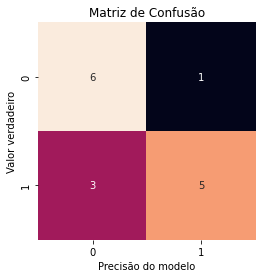

In [92]:
# problema binário de classificação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_true = [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]

mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Precisão do modelo")
plt.ylabel("Valor verdadeiro")

Text(91.68, 0.5, 'Valor verdadeiro')

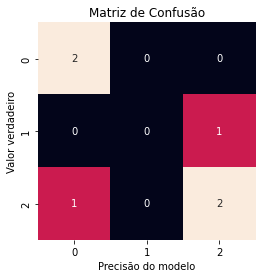

In [93]:
# problema de classificação com múltiplas classes
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

mat = confusion_matrix(y_true,y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Precisão do modelo")
plt.ylabel("Valor verdadeiro")

In [96]:
# exemplode Classification Report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
